# **EDA and Data Cleaning**

In [15]:
import pandas as pd
from os.path import join as opjoin
from glob import glob
from PIL import Image, ExifTags
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(color_codes=True)

In [6]:
dataset_path = '/mnt/fred/reddit/database_1597063213/'
df = pd.read_csv(opjoin(dataset_path, 'submissions.csv'))
print('{} submissions loaded...'.format(len(df)))

7910 submissions loaded...


In [7]:
df.head()

,author,created_utc,id,is_video,num_comments,permalink,score,title,url
0,Kelly240361,1595662427,hxitxn,False,43,/r/NatureIsFuckingLit/comments/hxitxn/cliffs_a...,161,"🔥 Cliffs at Dorset, England",https://i.imgur.com/7XUQeg7.jpg
1,redditsdaddio,1595640242,hxe5kk,False,27,/r/NatureIsFuckingLit/comments/hxe5kk/piebald_...,343,🔥 Piebald Deer 🔥,https://i.redd.it/ex7x37i5owc51.jpg
2,jillison_flook,1595625776,hxadzw,False,53,/r/NatureIsFuckingLit/comments/hxadzw/ocelittle/,419,🔥 Ocelittle 🔥,https://i.redd.it/glqvqmo4hvc51.jpg
3,d3333p7,1595621456,hx931q,False,34,/r/NatureIsFuckingLit/comments/hx931q/bear_chi...,471,🔥 Bear chilling by a lake,https://i.imgur.com/AxUPw0W.jpg
4,exoduscv,1595619724,hx8k16,False,32,/r/NatureIsFuckingLit/comments/hx8k16/water_dr...,651,🔥 Water droplets condensing on a fly 🔥,https://i.redd.it/j93cmny4zuc51.jpg


## **Image Data**

### Basics

- Check if image file of submission is present and healty
- Extract image filename, image width and height

In [8]:
img_sizes = []
filenames = []
dirty = []
for id in df['id']:
    filename = glob(opjoin(dataset_path, 'images', id + '*'))[0]
    try:
        img = Image.open(filename)
        img_sizes.append(list(img.size))
        filenames.append(filename.split('/')[-1])
    except:
        dirty.append(id)
    
print('{} images found, {} dirty submissions...'.format(len(img_sizes), len(dirty)))

7891 images found, 19 dirty submissions...


- Remove dirty submissions
- Add new columns for width, height and filename

In [9]:
df = df[~df['id'].isin(dirty)]
df['width'] = list(zip(*img_sizes))[0]
df['height'] = list(zip(*img_sizes))[1]
df['imgfile'] = filenames
df.head()

,author,created_utc,id,is_video,num_comments,permalink,score,title,url,width,height,imgfile
0,Kelly240361,1595662427,hxitxn,False,43,/r/NatureIsFuckingLit/comments/hxitxn/cliffs_a...,161,"🔥 Cliffs at Dorset, England",https://i.imgur.com/7XUQeg7.jpg,480,599,hxitxn.jpeg
1,redditsdaddio,1595640242,hxe5kk,False,27,/r/NatureIsFuckingLit/comments/hxe5kk/piebald_...,343,🔥 Piebald Deer 🔥,https://i.redd.it/ex7x37i5owc51.jpg,130,60,hxe5kk.jpeg
2,jillison_flook,1595625776,hxadzw,False,53,/r/NatureIsFuckingLit/comments/hxadzw/ocelittle/,419,🔥 Ocelittle 🔥,https://i.redd.it/glqvqmo4hvc51.jpg,1200,1179,hxadzw.jpeg
3,d3333p7,1595621456,hx931q,False,34,/r/NatureIsFuckingLit/comments/hx931q/bear_chi...,471,🔥 Bear chilling by a lake,https://i.imgur.com/AxUPw0W.jpg,1080,565,hx931q.jpeg
4,exoduscv,1595619724,hx8k16,False,32,/r/NatureIsFuckingLit/comments/hx8k16/water_dr...,651,🔥 Water droplets condensing on a fly 🔥,https://i.redd.it/j93cmny4zuc51.jpg,1080,1350,hx8k16.jpeg


### Image Sizes

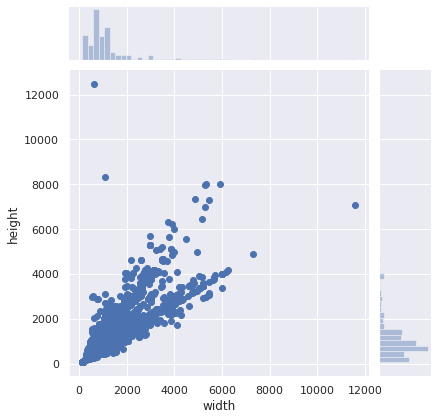

In [10]:
sns.jointplot(x='width', y='height', data=df)

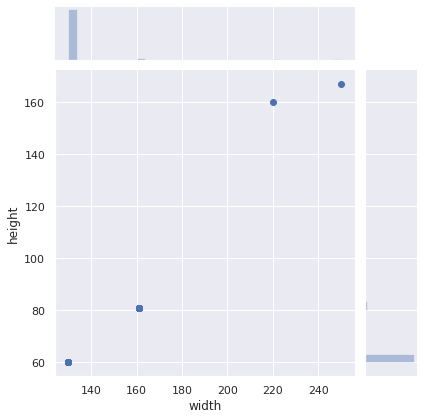

In [11]:
df_small = df[(df['width'] <= 256) & (df['height'] <= 256)]
sns.jointplot(x='width', y='height', data=df_small)

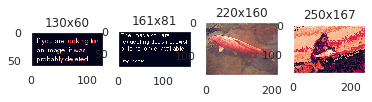

In [21]:
df_small_unique = df_small.drop_duplicates(['width', 'height'])
fig, ax = plt.subplots(1, len(df_small_unique))
for i, (index, row) in enumerate(df_small_unique.iterrows()):
    img = Image.open(opjoin(dataset_path, 'images', row['imgfile']))
    img.show()
    img_arr = np.asarray(img)
    ax[i].set_title('{}x{}'.format(row['width'], row['height']))
    ax[i].grid(False)
    ax[i].imshow(img_arr)
plt.show()

In [25]:
condition = ((df['width'] == 130) & (df['height'] == 60)) | ((df['width'] == 161) & (df['height'] == 81))
print('{} images were already deleted...'.format(len(df[condition])))

1065
